In [13]:
import json
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
 
with open('Path_data/2024_05_20_01_00_01.json', 'r') as file:
    loaded_data = json.load(file)

with open('Path_data/2024_04_20_20_23_13.json', 'r') as file:
    preparing_data = json.load(file)

In [3]:
N_nego = 0
N_lc = 0
N_prep = 0
N_done = 0
# Define Status [EXPERIMENT PREPARING, PREPARING, NEGOTIATING, LANE CHANGING, DONE]
for i in preparing_data:
    if i['STATUS'] == 'NEGOTIATING':
        N_nego += 1
    elif i['STATUS'] == 'PREPARING':
        N_prep += 1
    elif i['STATUS'] == 'LANE CHANGING':
        N_lc += 1
    elif i['STATUS'] == 'DONE':
        N_done += 1
    else:
        print(i['STATUS'])
print(N_nego,N_prep,N_lc,N_done)

138 64 551 0


In [4]:
order = set()
for path in preparing_data:
    if path['STATUS']=='PREPARING':
        order.add(path['ORDER'])

print(order)

{12, 13, 14, 15}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


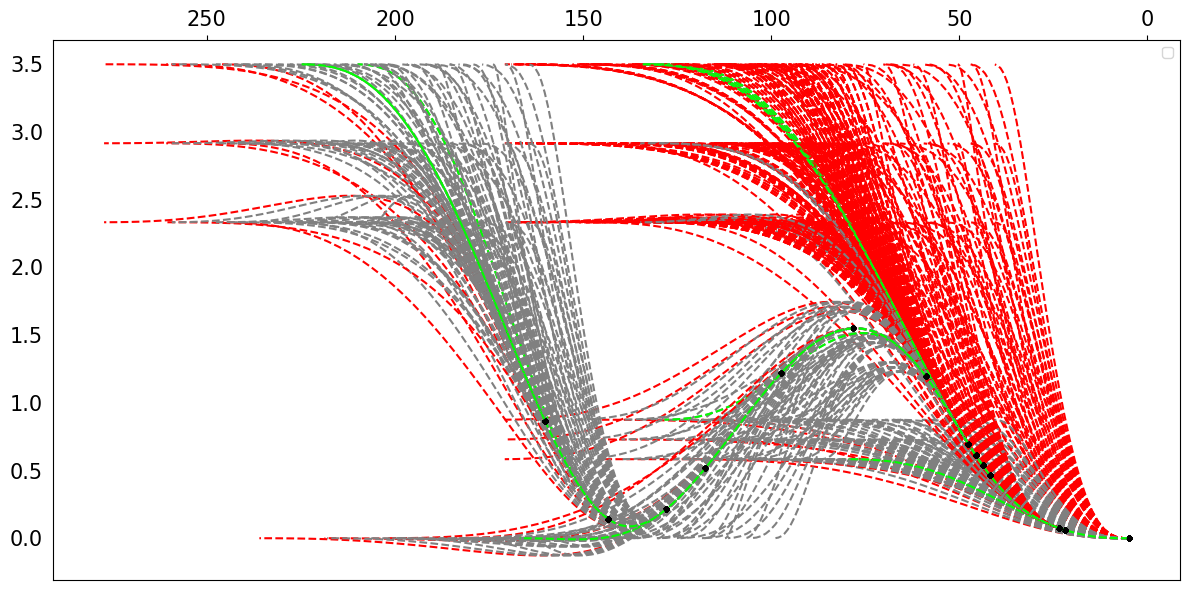

In [5]:
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
ax2 = plt.subplot(1,1,1)
for path in loaded_data:
    temp_d = np.array(path['d'])
    if path['d'][0]<0:
        temp_d = np.array(path['d'])+3.5
    if path['AVAILABLE'] ==  'POSSIBLE':
        # continue
        color = 'gray'
    elif path['AVAILABLE'] == 'IMPOSSIBLE':
        color = 'r'
    elif path['AVAILABLE'] == 'SELECTED':
        color = 'lime'
    ax2.plot(path['s'],temp_d , '--',markersize=3,  color = color)
    ax2.plot(path['s'][0],temp_d[0] , 'o',markersize=3,  color = 'k')
    ax2.tick_params(labelsize = 15, top=True,labeltop=True,bottom=False,labelbottom=False, left= False, labelleft = True)
    

ax2.invert_xaxis()
plt.tight_layout()
plt.legend()
plt.show()  # 그래프 보여주기

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'LANE CHANGING'}


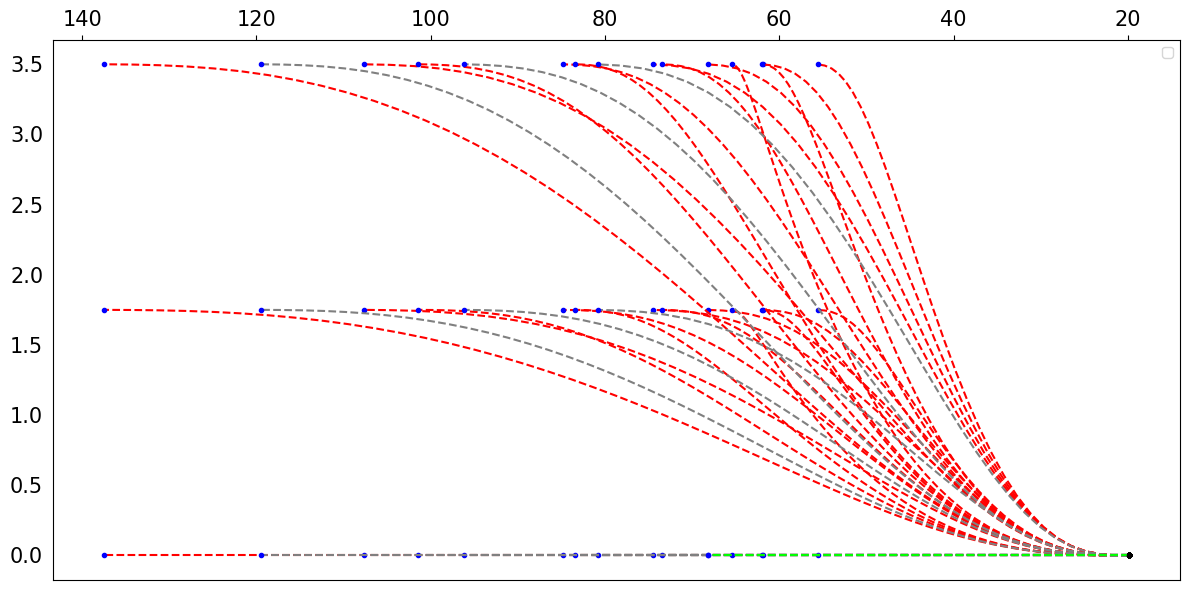

In [23]:
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
ax2 = plt.subplot(1,1,1)
display_order = set()
for path in loaded_data:
    if path['ORDER'] == 2:
        display_order.add(path['STATUS'])
        temp_d = np.array(path['d'])
        if path['d'][0]<0:
            temp_d = np.array(path['d'])+3.5
        if path['AVAILABLE'] ==  'POSSIBLE':
            # continue
            color = 'gray'
        elif path['AVAILABLE'] == 'IMPOSSIBLE':
            color = 'r'
        elif path['AVAILABLE'] == 'SELECTED':
            color = 'lime'
        ax2.plot(path['s'],temp_d , '--',markersize=3,  color = color)
        ax2.plot(path['s'][0],temp_d[0] , 'o',markersize=3,  color = 'k')
        ax2.plot(path['s'][-1],temp_d[-1] , 'o',markersize=3,  color = 'b')
        ax2.tick_params(labelsize = 15, top=True,labeltop=True,bottom=False,labelbottom=False, left= False, labelleft = True)
    
print(display_order)
ax2.invert_xaxis()
plt.tight_layout()
plt.legend()
plt.show()  # 그래프 보여주기

1
78.20687216510719
set()
PREPARING


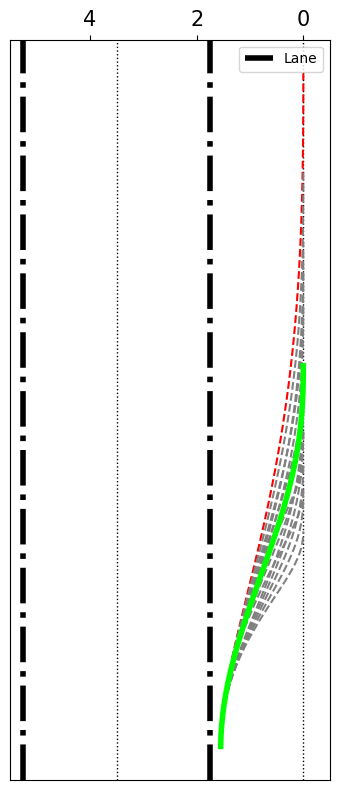

In [4]:

plt.figure(figsize=(3.5, 8))  # 그래프 크기 설정
# ax1 = plt.subplot(1,2,1)
# ax1.set_xlim([-160,-50])
order = set()
ax2 = plt.subplot(1,1,1)

ax2.set_xlim([-0.5,5.5])

print(preparing_data[0]['ORDER'])
selected_path = None
DISPLAYED = False
ax2.axvline(x=1.75,linestyle='-.', color = 'k',linewidth = 4)
ax2.axvline(x=0, linestyle=':',linewidth = 1 ,color = 'k')
ax2.axvline(x=3.5, linestyle=':',linewidth = 1 ,color = 'k')
ax2.axvline(x=5.25,linestyle='-.', color = 'k',linewidth = 4,label = 'Lane')
for path in preparing_data:
    if path['ORDER'] == 13:
        minimum_s = min(path['s'])
        print(minimum_s)
        break
print(order)
for path in preparing_data:
    if path['ORDER'] == 13:
        if not DISPLAYED:
            print(path['STATUS'])
            DISPLAYED=True
        if path['AVAILABLE'] ==  'POSSIBLE':
            # continue
            color = 'gray'
        elif path['AVAILABLE'] == 'IMPOSSIBLE':
            color = 'r'
        elif path['AVAILABLE'] == 'SELECTED':
            selected_path = deepcopy(path)
            continue
        adjusted = [(x-minimum_s) for x in path['s']]
        ax2.plot(path['d'], adjusted, '--',markersize=3,  color = color)
    color = 'lime'
adjusted = [(x-minimum_s) for x in selected_path['s']]
ax2.plot(selected_path['d'], adjusted, '-',linewidth=4,  color = color)
ax2.tick_params(labelsize = 15, top=True,labeltop=True,bottom=False,labelbottom=False, left= False, labelleft = False)

ax2.invert_xaxis()
plt.tight_layout()
plt.legend()
plt.show()  # 그래프 보여주기

1
118.4324879148889
NEGOTIATING


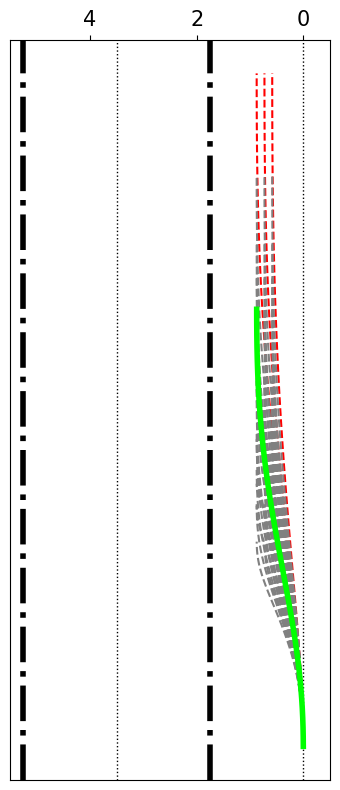

In [243]:
plt.figure(figsize=(3.5, 8))  # 그래프 크기 설정
# ax1 = plt.subplot(1,2,1)
# ax1.set_xlim([-160,-50])
ax2 = plt.subplot(1,1,1)
ax2.set_xlim([-0.5,5.5])
print(preparing_data[0]['ORDER'])
selected_path = None
DISPLAYED = False
ax2.axvline(x=1.75,linestyle='-.', color = 'k',linewidth = 4)
ax2.axvline(x=0, linestyle=':',linewidth = 1 ,color = 'k')
ax2.axvline(x=3.5, linestyle=':',linewidth = 1 ,color = 'k')
ax2.axvline(x=5.25,linestyle='-.', color = 'k',linewidth = 4)
for path in loaded_data:
    if path['ORDER'] == 11:
        minimum_s = min(path['s'])
        print(minimum_s)
        break
for path in loaded_data:
    if path['ORDER'] == 11:
        if not DISPLAYED:
            print(path['STATUS'])
            DISPLAYED=True
        if path['AVAILABLE'] ==  'POSSIBLE':
            # continue
            color = 'gray'
        elif path['AVAILABLE'] == 'IMPOSSIBLE':
            color = 'r'
        elif path['AVAILABLE'] == 'SELECTED':
            selected_path = deepcopy(path)
            continue
        adjusted = [(x-minimum_s) for x in path['s']]
        ax2.plot(path['d'], adjusted, '--',markersize=3,  color = color)
    color = 'lime'
adjusted = [(x-minimum_s) for x in selected_path['s']]
ax2.plot(selected_path['d'], adjusted, '-',linewidth=4,  color = color)

ax2.invert_xaxis()
ax2.tick_params(labelsize = 15, top=True,labeltop=True,bottom=False,labelbottom=False, left= False, labelleft = False)

plt.tight_layout()
plt.show()  # 그래프 보여주기

In [5]:
order = set()
for path in loaded_data:
    if path['STATUS']=='NEGOTIATING':
        order.add(path['ORDER'])

print(order)

{11, 13}


10
161.8302521854291
LANE CHANGING


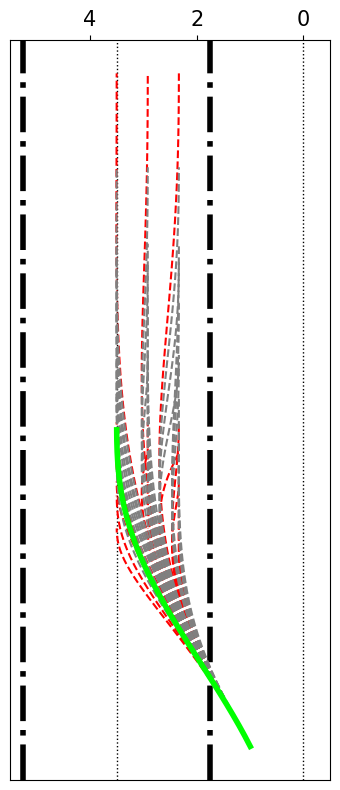

In [6]:
plt.figure(figsize=(3.5, 8))  # 그래프 크기 설정

ax2 = plt.subplot(1,1,1)
ax2.set_xlim([-0.5,5.5])

ax2.axvline(x=1.75,linestyle='-.', color = 'k',linewidth = 4)
ax2.axvline(x=0, linestyle=':',linewidth = 1 ,color = 'k')
ax2.axvline(x=3.5, linestyle=':',linewidth = 1 ,color = 'k')
ax2.axvline(x=5.25,linestyle='-.', color = 'k',linewidth = 4)
print(loaded_data[0]['ORDER'])
for path in loaded_data:
    if path['ORDER'] == 15:
        minimum_s = min(path['s'])
        print(minimum_s)
        break
selected_path = None
DISPLAYED = False
for path in loaded_data:
    if path['ORDER'] == 15:
        if not DISPLAYED:
            print(path['STATUS'])
            DISPLAYED=True
        if path['AVAILABLE'] ==  'POSSIBLE':
            # continue
            color = 'gray'
        elif path['AVAILABLE'] == 'IMPOSSIBLE':
            color = 'r'
        elif path['AVAILABLE'] == 'SELECTED':
            selected_path = deepcopy(path)
            continue
        adjusted = [(x-minimum_s) for x in path['s']]
        ax2.plot(path['d'], adjusted, '--',markersize=3,  color = color)
    color = 'lime'
adjusted = [(x-minimum_s) for x in selected_path['s']]
ax2.plot(selected_path['d'], adjusted, '-',linewidth=4,  color = color)
ax2.invert_xaxis()
ax2.tick_params(labelsize = 15, top=True,labeltop=True,bottom=False,labelbottom=False, left= False, labelleft = False)
plt.tight_layout()


plt.show()  # 그래프 보여주기

## Actual path and Planned path

In [114]:
import json
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from scipy.interpolate import interp1d

with open('Path_data/2024_05_04_19_29_13_ACTUAL.json', 'r') as file: #2024_05_04_19_29_13_ACTUAL.json
    ACTUAL_PATH = json.load(file)

with open('Path_data/2024_05_04_19_29_13_PLANNED.json', 'r') as file: #2024_05_04_19_29_13_PLANNED.json
    PLANNED_PATH = json.load(file)
max_y = max(max(ACTUAL_PATH['y']),max(PLANNED_PATH['y']))
temp_y_actual = max_y-np.array(ACTUAL_PATH['y'])
temp_y_planned = max_y-np.array(PLANNED_PATH['y'])
ACTUAL_PATH['y'] = temp_y_actual.tolist()
PLANNED_PATH['y'] = temp_y_planned.tolist()

max_x = max(max(ACTUAL_PATH['x']),max(PLANNED_PATH['x']))
temp_x_actual = max_x-np.array(ACTUAL_PATH['x'])
temp_x_planned = max_x-np.array(PLANNED_PATH['x'])
ACTUAL_PATH['x'] = temp_x_actual.tolist()
PLANNED_PATH['x'] = temp_x_planned.tolist()

3.1381714972061596 1.0945587158203125
Average y diff: 0.34394550083977465


(2.043612781385847, 0.12293753623962403)

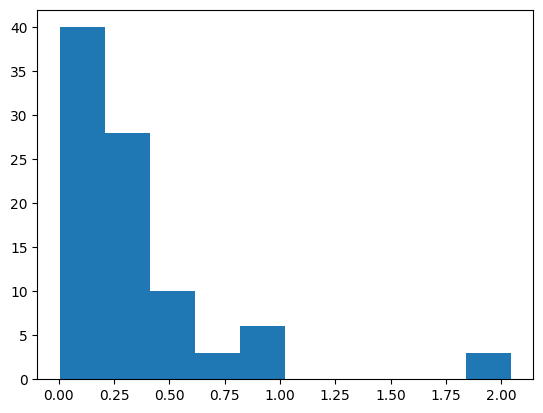

In [115]:
# Define interpolation function for the planned path
actual_interpolate = interp1d(ACTUAL_PATH['t'], ACTUAL_PATH['y'], kind='linear', fill_value='extrapolate')
planned_t = np.array(PLANNED_PATH['t'])
# Interpolate y values from the planned path at the timestamps of the actual path
interpolated_actual_y = actual_interpolate(planned_t+0.2)

# Calculate the differences in y values at the corresponding timestamps
y_diff = np.abs(PLANNED_PATH['y'] - interpolated_actual_y)

# Find the maximum difference
max_y_diff = np.max(y_diff)
max_y_diff_index = np.argmax(y_diff)
time_of_max_diff = planned_t[max_y_diff_index]
print(interpolated_actual_y[max_y_diff_index], PLANNED_PATH['y'][max_y_diff_index])
print('Average y diff:', np.sum(y_diff)/len(y_diff))
plt.hist(y_diff)
max_y_diff, time_of_max_diff


2.2813951532379226 2.2143783569335938


(0.06701679630432889, 5.084402418136596)

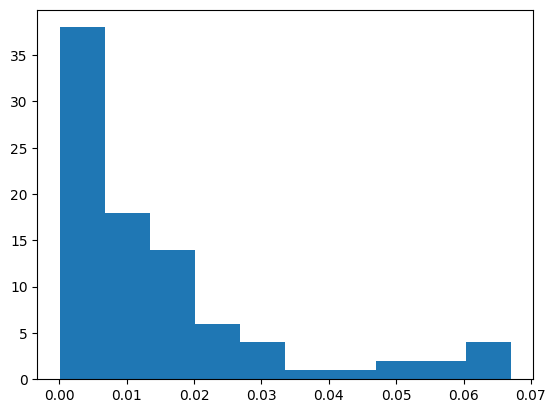

In [116]:
# Define interpolation function for the planned path
actual_interpolate = interp1d(ACTUAL_PATH['t'], ACTUAL_PATH['x'], kind='linear', fill_value='extrapolate')
planned_t = np.array(PLANNED_PATH['t'])
# Interpolate y values from the planned path at the timestamps of the actual path
interpolated_actual_x = actual_interpolate(planned_t+0.2)

# Calculate the differences in y values at the corresponding timestamps
x_diff = np.abs(PLANNED_PATH['x'] - interpolated_actual_x)

# Find the maximum difference
max_x_diff = np.max(x_diff)
max_x_diff_index = np.argmax(x_diff)
time_of_max_diff = planned_t[max_x_diff_index]
plt.hist(x_diff)
print(interpolated_actual_x[max_x_diff_index], PLANNED_PATH['x'][max_x_diff_index])
max_x_diff, time_of_max_diff

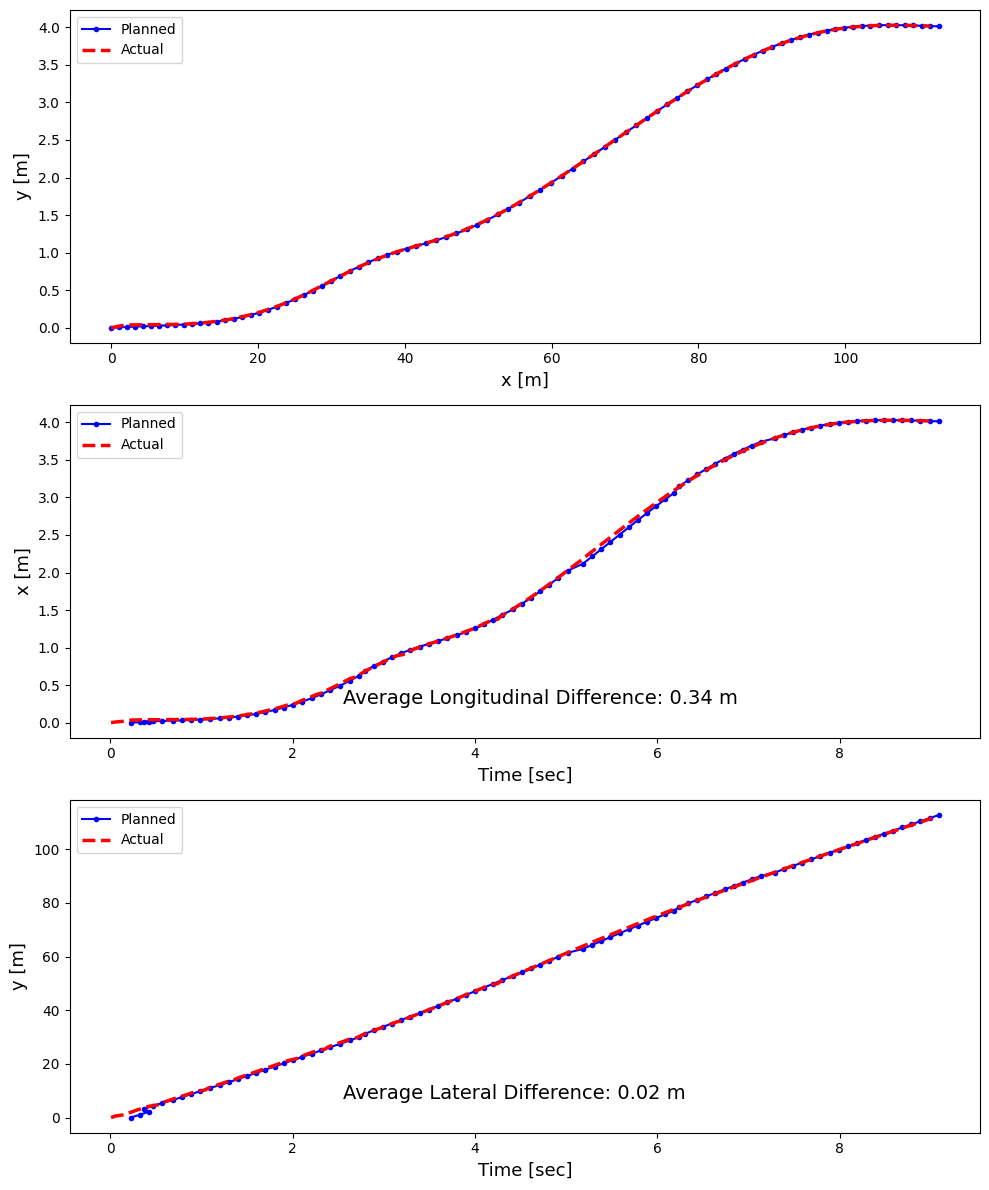

In [117]:
plt.figure(figsize=(10, 12))
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)
ax1.plot(PLANNED_PATH['y'],PLANNED_PATH['x'],'-o',markersize = 3,  color = 'b', label = 'Planned')
ax1.plot(ACTUAL_PATH['y'],ACTUAL_PATH['x'],'--', linewidth = 2.5,  color = 'r', label = 'Actual')
ax1.set_xlabel('x [m]',fontsize=13)
ax1.set_ylabel('y [m]',fontsize=13)

# ax1.set_xlim([-120,-110])
# ax1.set_ylim([12,12.4])
planned_t = np.array(PLANNED_PATH['t'])

ax2.plot(planned_t+0.2, PLANNED_PATH['x'],'-o',markersize =3,  color = 'b', label = 'Planned')
ax2.plot(ACTUAL_PATH['t'], ACTUAL_PATH['x'],'--', linewidth = 2.5,  color = 'r', label = 'Actual')
avg_diff_y = np.mean(y_diff)
ax2.text(0.3, 0.1, f'Average Longitudinal Difference: {avg_diff_y:.2f} m', transform=ax2.transAxes, fontsize=14, color='k')
ax2.set_xlabel('Time [sec]',fontsize=13)
ax2.set_ylabel('x [m]',fontsize=13)

ax3.plot(planned_t+0.2,PLANNED_PATH['y'],'-o',markersize=3,  color = 'b', label = 'Planned')
ax3.plot(ACTUAL_PATH['t'],ACTUAL_PATH['y'],'--', linewidth = 2.5,  color = 'r', label = 'Actual')
avg_diff_x = np.mean(x_diff)
ax3.text(0.3, 0.1, f'Average Lateral Difference: {avg_diff_x:.2f} m', transform=ax3.transAxes, fontsize=14, color='k')
ax3.set_xlabel('Time [sec]',fontsize=13)
ax3.set_ylabel('y [m]',fontsize=13)

# ax3.set_xlim([5.4, 5.5])
# ax3.set_ylim([-125, -120])


ax1.legend()
ax2.legend()
ax3.legend()
plt.tight_layout()
plt.show()  # 그래프 보여주기


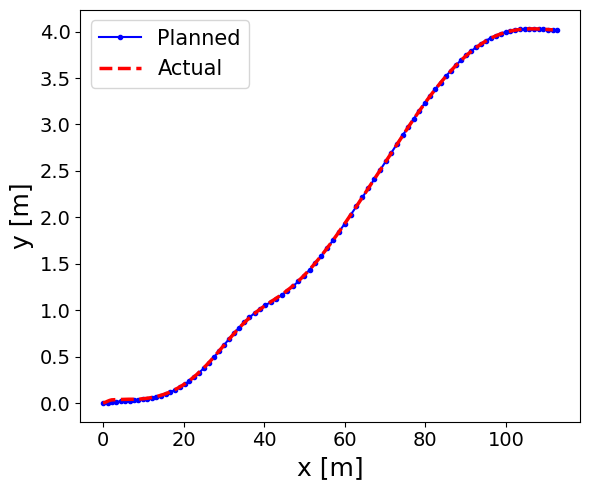

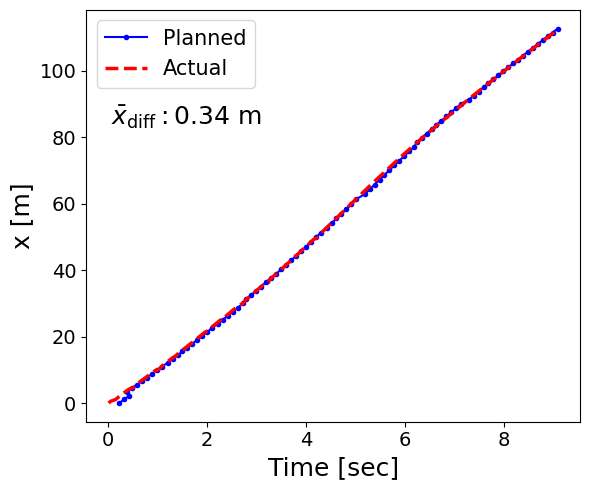

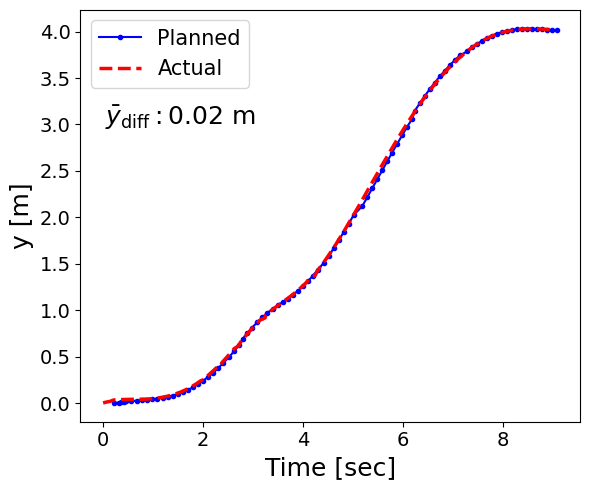

In [120]:
plt.figure(figsize=(6, 5))
ax1 = plt.subplot(1,1,1)
ax1.plot(PLANNED_PATH['y'],PLANNED_PATH['x'],'-o',markersize = 3,  color = 'b', label = 'Planned')
ax1.plot(ACTUAL_PATH['y'],ACTUAL_PATH['x'],'--', linewidth = 2.5,  color = 'r', label = 'Actual')
ax1.set_xlabel('x [m]',fontsize=18)
ax1.set_ylabel('y [m]',fontsize=18)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize = 14)
plt.tight_layout()
plt.show()  # 그래프 보여주기

# ax1.set_xlim([-120,-110])
# ax1.set_ylim([12,12.4])
plt.figure(figsize=(6, 5))
ax2 = plt.subplot(1,1,1)
planned_t = np.array(PLANNED_PATH['t'])
ax2.plot(planned_t+0.2, PLANNED_PATH['y'],'-o',markersize =3,  color = 'b', label = 'Planned')
ax2.plot(ACTUAL_PATH['t'], ACTUAL_PATH['y'],'--', linewidth = 2.5,  color = 'r', label = 'Actual')
avg_diff_y = np.mean(y_diff)
ax2.text(0.05, 0.72,r'$\bar{{x}}_\mathrm{{diff}}: {:.2f}$ m'.format(avg_diff_y), transform=ax2.transAxes, fontsize=18, color='k')
ax2.set_xlabel('Time [sec]',fontsize=18)
ax2.set_ylabel('x [m]',fontsize=18)
ax2.legend(fontsize=15)
ax2.tick_params(labelsize = 14)
plt.tight_layout()
plt.show()  # 그래프 보여주기

plt.figure(figsize=(6, 5))
ax3 = plt.subplot(1,1,1)
ax3.plot(planned_t+0.2,PLANNED_PATH['x'],'-o',markersize=3,  color = 'b', label = 'Planned')
ax3.plot(ACTUAL_PATH['t'],ACTUAL_PATH['x'],'--', linewidth = 2.5,  color = 'r', label = 'Actual')
avg_diff_x = np.mean(x_diff)
ax3.text(0.05, 0.72,r'$\bar{{y}}_\mathrm{{diff}}: {:.2f}$ m'.format(avg_diff_x), transform=ax3.transAxes, fontsize=18, color='k')
ax3.set_xlabel('Time [sec]',fontsize=18)
ax3.set_ylabel('y [m]',fontsize=18)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize = 14)
# ax3.set_xlim([5.4, 5.5])
# ax3.set_ylim([-125, -120])


plt.tight_layout()
plt.show()  # 그래프 보여주기